# Подключение и осмотр набора данных

In [38]:
import pandas as pd
dataset = pd.read_csv("Breast_cancer_data.csv")
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


# Анализ данных

In [39]:
import pandas as pd
dataset = pd.read_csv("Breast_cancer_data.csv")
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


# Нормализация значений в наборе данных

In [40]:
for column in dataset.columns:
    if column != "Breast_cancer_data.csv":
        dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())


dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.627417
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.000000
50%,0.302381,0.308759,0.293345,0.172895,0.390358,1.000000
75%,0.416442,0.408860,0.416765,0.271135,0.475490,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Проверка данных на корреляцию


In [41]:
dataset.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


In [42]:
table = dataset.corr()
for column in table.columns:
    counter = 0
    for element in table[column]:
        if 1 > abs(element) > 0.5:
            counter += 1
    print(column, counter)

mean_radius 3
mean_texture 0
mean_perimeter 3
mean_area 3
mean_smoothness 0
diagnosis 3


In [43]:
dataset.pop('mean_radius')
dataset.pop('mean_perimeter')
dataset.pop('mean_area')

0      0.363733
1      0.501591
2      0.449417
3      0.102906
4      0.489290
         ...   
564    0.566490
565    0.474019
566    0.303118
567    0.475716
568    0.015907
Name: mean_area, Length: 569, dtype: float64

# Разделение данных на тренировочные и тестовые

In [44]:
train = dataset.copy()
train.pop('diagnosis')

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: diagnosis, Length: 569, dtype: float64

In [45]:
test = dataset.copy()
test = test['diagnosis']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, test,test_size=0.2)

# Тренировка, обучение и проверка модели

In [47]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [48]:
y_train.head()

428    1.0
554    1.0
123    1.0
201    0.0
389    0.0
Name: diagnosis, dtype: float64

In [49]:
model.fit(x_train, y_train)

GaussianNB()

In [50]:
predictions = model.predict(x_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, predictions))

0.8157894736842105


<AxesSubplot:ylabel='0'>

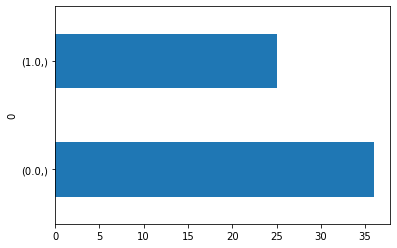

In [30]:
prediction_table = pd.DataFrame(data=predictions)
prediction_table.value_counts().plot(kind='barh')

<AxesSubplot:>

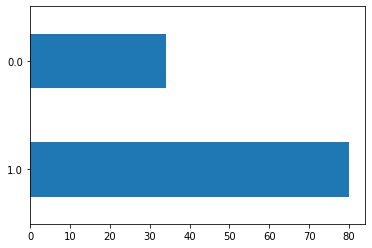

In [51]:
y_test.value_counts().plot(kind='barh')

# Пользовательский ввод

In [52]:
import numpy as np

raw_dataset = pd.read_csv("Breast_cancer_data.csv")

test_value = np.array([])
for column in x_train.columns:
    x = float(input(f"Enter the value for {column}: "))
    x = (x - raw_dataset[column].min()) / (raw_dataset[column].max() - raw_dataset[column].min())
    test_value = np.append(
        test_value,
        x
    )

test_value = test_value.reshape(-1, 1)

Enter the value for mean_texture: 15
Enter the value for mean_smoothness: 0.1


In [53]:
result = model.predict(test_value)
print(result[0])

1.0
